1. Title: Cardiac Arrhythmia Database
      The aim is to determine the type of arrhythmia from
      the ECG recordings.

2. Relevant Information:
     This database contains 279 attributes, 206 of which are linear
     valued and the rest are nominal.

     Concerning the study of H. Altay Guvenir: "The aim is to distinguish
     between the presence and absence of cardiac arrhythmia and to
     classify it in one of the 16 groups.

     class 01 refers to 'normal' ECG

     classes 02 to 15 refers to different classes of arrhythmia
     
     class 16 refers to the rest of unclassified ones.

     For the time being, there exists a computer program that makes such a
     classification. However there are differences between the
     cardiolog's and the programs classification. Taking the
     cardiolog's as a gold standard we aim to minimise this difference
     by means of machine learning tools."

     The names and id numbers of the patients were recently
     removed from the database.

3. Number of Instances: 452

4. Number of Attributes: 279

5. Attribute Information:
   
   Complete attribute documentation:
      
      1 Age: Age in years , linear

      2 Sex: Sex (0 = male; 1 = female) , nominal

      3 Height: Height in centimeters , linear

      4 Weight: Weight in kilograms , linear

      5 QRS duration: Average of QRS duration in msec, linear

      6 P-R interval: Average duration between onset of P and Q waves in msec, linear
      
      7 Q-T interval: Average duration between onset of Q and offset of T waves in msec, linear
      
      8 T interval: Average duration of T wave in msec., linear
      
      9 P interval: Average duration of P wave in msec., linear
     Vector angles in degrees on front plane of:, linear
     
     10 QRS
     
     11 T
     
     12 P
     
     13 QRST
     
     14 J

     15 Heart rate: Number of heart beats per minute ,linear
    
     Of channel DI:
      
      Average width, in msec., of: linear
      
      16 Q wave
      
      17 R wave
      
      18 S wave
      
      19 R' wave, small peak just after R
      
      20 S' wave

      21 Number of intrinsic deflections, linear

      22 Existence of ragged R wave, nominal
      
      23 Existence of diphasic derivation of R wave, nominal
      
      24 Existence of ragged P wave, nominal
      
      25 Existence of diphasic derivation of P wave, nominal
      
      26 Existence of ragged T wave, nominal
      
      27 Existence of diphasic derivation of T wave, nominal

     Of channel DII:
      28 .. 39 (similar to 16 .. 27 of channel DI)
     
     Of channels DIII:
      40 .. 51
     
     Of channel AVR:
      52 .. 63
     
     Of channel AVL:
      64 .. 75
     
     Of channel AVF:
      76 .. 87
     
     Of channel V1:
      88 .. 99
     
     Of channel V2:
      100 .. 111
     
     Of channel V3:
      112 .. 123
     
     Of channel V4:
      124 .. 135
     
     Of channel V5:
      136 .. 147
     
     Of channel V6:
      148 .. 159

     Of channel DI:
      
      Amplitude , * 0.1 milivolt, of
      
      160 JJ wave, linear
      
      161 Q wave, linear
      
      162 R wave, linear
      
      163 S wave, linear
      
      164 R' wave, linear
      
      165 S' wave, linear
      
      166 P wave, linear
      
      167 T wave, linear
      
      168 QRSA , Sum of areas of all segments divided by 10,
      
      ( Area= width * height / 2 ), linear
      
      169 QRSTA = QRSA + 0.5 * width of T wave * 0.1 * height of T
      
      wave. (If T is diphasic then the bigger segment is considered), linear

     Of channel DII:
      170 .. 179
     
     Of channel DIII:
      180 .. 189
     
     Of channel AVR:
      190 .. 199
     
     Of channel AVL:
      200 .. 209
     
     Of channel AVF:
      210 .. 219
     
     Of channel V1:
      220 .. 229
     
     Of channel V2:
      230 .. 239
     
     Of channel V3:
      240 .. 249
     
     Of channel V4:
      250 .. 259
     
     Of channel V5:
      260 .. 269
     
     Of channel V6:
      270 .. 279
      
8. Missing Attribute Values: Several.  Distinguished with '?'.

9. Class Distribution:
       Database:  Arrhythmia
       
       Class code :   Class   :                       Number of instances:
       01             Normal				          245
       02             Ischemic changes (Coronary Artery Disease)   44
       03             Old Anterior Myocardial Infarction           15
       04             Old Inferior Myocardial Infarction           15
       05             Sinus tachycardy			           13
       06             Sinus bradycardy			           25
       07             Ventricular Premature Contraction (PVC)       3
       08             Supraventricular Premature Contraction	    2
       09             Left bundle branch block 		            9
       10             Right bundle branch block		           50
       11             1. degree AtrioVentricular block	            0
       12             2. degree AV block		            0
       13             3. degree AV block		            0
       14             Left ventricule hypertrophy 	            4
       15             Atrial Fibrillation or Flutter	            5
       16             Others				           22



In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Step 2: Load the Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"
column_names = [f'feature_{i+1}' for i in range(279)] + ['class']
data = pd.read_csv(url, header=None, names=column_names)

# Display first few rows of the dataset
print("Dataset loaded:")
print(data.head())

Dataset loaded:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0         75          0        190         80         91        193   
1         56          1        165         64         81        174   
2         54          0        172         95        138        163   
3         55          0        175         94        100        202   
4         75          0        190         80         88        181   

   feature_7  feature_8  feature_9  feature_10  ... feature_271 feature_272  \
0        371        174        121         -16  ...         0.0         9.0   
1        401        149         39          25  ...         0.0         8.5   
2        386        185        102          96  ...         0.0         9.5   
3        380        179        143          28  ...         0.0        12.2   
4        360        177        103         -16  ...         0.0        13.1   

  feature_273 feature_274 feature_275  feature_276  feature_277  feature_278  \
0 


Missing values in each column:
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_276    0
feature_277    0
feature_278    0
feature_279    0
class          0
Length: 280, dtype: int64


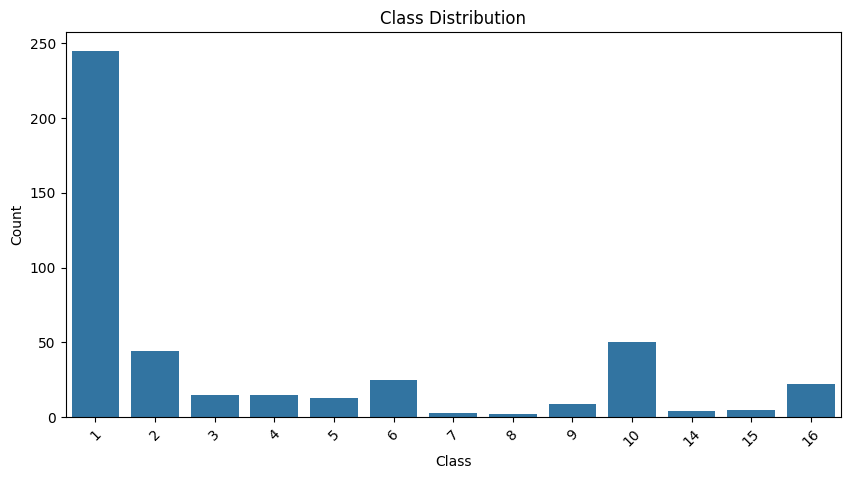

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Distribution of classes
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 4: Data Pre-Processing
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Impute missing values with the mean for numerical features
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :-1] = imputer.fit_transform(data.iloc[:, :-1])

# Convert class column to numeric
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

# Feature scaling
scaler = StandardScaler()
X = data.iloc[:, :-1]
y = data['class']
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 5: Train Machine Learning Models
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Step 6: Evaluate Model Performance
print("\nLogistic Regression Performance:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic)}\n")

print("Decision Tree Performance:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}\n")

print("Random Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")


Logistic Regression Performance:
[[38  2  0  0  0  0  0  0  2  0  0  2]
 [ 4  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  1  0  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0]
 [ 5  1  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        44
           1       0.43      0.43      0.43         7
           2       1.00      0.80      0.89         5
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         2
           5       1.00      0.17      0.29         6
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         1
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
# Step 7: Deploy Trained Model for New Input Data
def predict_new_data(model, new_data):
    new_data_scaled = scaler.transform(new_data)
    prediction = model.predict(new_data_scaled)
    return label_encoder.inverse_transform(prediction)

In [ ]:
"""
  -- Complete attribute documentation:
      1 Age: Age in years , linear
      2 Sex: Sex (0 = male; 1 = female) , nominal
      3 Height: Height in centimeters , linear
      4 Weight: Weight in kilograms , linear
      5 QRS duration: Average of QRS duration in msec., linear
      6 P-R interval: Average duration between onset of P and Q waves in msec., linear
      7 Q-T interval: Average duration between onset of Q and offset of T waves in msec., linear
      8 T interval: Average duration of T wave in msec., linear
      9 P interval: Average duration of P wave in msec., linear
      Vector angles in degrees on front plane of:, linear
     10 QRS
     11 T
     12 P
     13 QRST
     14 J

     15 Heart rate: Number of heart beats per minute ,linear

     Of channel DI:
      Average width, in msec., of: linear
      16 Q wave
      17 R wave
      18 S wave
      19 R' wave, small peak just after R
      20 S' wave

      21 Number of intrinsic deflections, linear

      22 Existence of ragged R wave, nominal
      23 Existence of diphasic derivation of R wave, nominal
      24 Existence of ragged P wave, nominal
      25 Existence of diphasic derivation of P wave, nominal
      26 Existence of ragged T wave, nominal
      27 Existence of diphasic derivation of T wave, nominal

     Of channel DII:
      28 .. 39 (similar to 16 .. 27 of channel DI)
     Of channels DIII:
      40 .. 51
     Of channel AVR:
      52 .. 63
     Of channel AVL:
      64 .. 75
     Of channel AVF:
      76 .. 87
     Of channel V1:
      88 .. 99
     Of channel V2:
      100 .. 111
     Of channel V3:
      112 .. 123
     Of channel V4:
      124 .. 135
     Of channel V5:
      136 .. 147
     Of channel V6:
      148 .. 159

     Of channel DI:
      Amplitude , * 0.1 milivolt, of
      160 JJ wave, linear
      161 Q wave, linear
      162 R wave, linear
      163 S wave, linear
      164 R' wave, linear
      165 S' wave, linear
      166 P wave, linear
      167 T wave, linear

      168 QRSA , Sum of areas of all segments divided by 10, ( Area= width * height / 2 ), linear
      169 QRSTA = QRSA + 0.5 * width of T wave * 0.1 * height of T wave. (If T is diphasic then the bigger segment is considered), linear

     Of channel DII:
      170 .. 179
     Of channel DIII:
      180 .. 189
     Of channel AVR:
      190 .. 199
     Of channel AVL:
      200 .. 209
     Of channel AVF:
      210 .. 219
     Of channel V1:
      220 .. 229
     Of channel V2:
      230 .. 239
     Of channel V3:
      240 .. 249
     Of channel V4:
      250 .. 259
     Of channel V5:
      260 .. 269
     Of channel V6:
      270 .. 279
    """

In [ ]:
import numpy as np

# Creating a new input data array with 279 features
new_data = np.array([[
    60, 1, 170, 70, 90, 150, 400, 20, 30, 10,
    5, 10, 15, 10, 70, 0.1, 0.1, 0.1, 0.1, 0.1,
    4, 0, 1, 0, 1, 0, 1, 0.1, 0.1, 0.1,
    0.1, 0.1, 4, 0, 1, 0, 1, 0,
    1, 0.1, 0.1, 0.1, 0.1, 0.1, 4, 0,
    1, 0, 1, 0, 1, 0.1, 0.1, 0.1,
    0.1, 0.1, 4, 0, 1, 0, 1, 0,
    1, 0.1, 0.1, 0.1, 0.1, 0.1, 4,
    0, 1, 0, 1, 0, 1, 0.1, 0.1,
    0.1, 0.1, 0.1, 4, 0, 1, 0,
    1, 0, 1, 0.1, 0.1, 0.1, 0.1,
    0.1, 4, 0, 1, 0, 1, 0, 1,
    0.1, 0.1, 0.1, 0.1, 0.1, 4,
    0, 1, 0, 1, 0, 1, 0.1, 0.1,
    0.1, 0.1, 0.1, 4, 0, 1, 0,
    1, 0, 1, 0.1, 0.1, 0.1, 0.1,
    0.1, 4, 0, 1, 0, 1, 0, 1,
    0.1, 0.1, 0.1, 0.1, 0.1, 4,
    0, 1, 0, 1, 0, 1, 0.1, 0.1,
    0.1, 0.1, 0.1, 4, 0, 1, 0,
    1, 0, 1, 0.1, 0.1, 0.1, 0.1,
    0.1, 4, 0, 1, 0, 1, 0, 1,
    0.1, 0.1, 0.1, 0.1, 0.1, 4,
    0, 1, 0, 1, 0, 1, 0.1, 0.1,
    0.1, 0.1, 0.1, 4, 0, 1, 0,
    1, 0, 1, 0.1, 0.1, 0.1, 0.1,
    0.1, 4, 0, 1, 0, 1, 0, 1,
    0.1, 0.1, 0.1, 0.1, 0.1, 4,
    0, 1, 0, 1, 0, 1, 0.1, 0.1,
    0.1, 0.1, 0.1, 4, 0, 1, 0,
    1, 0, 1, 0.1, 0.1, 0.1, 0.1,
    0.1, 0.1, 0.1, 4, 0, 1, 0,
    1, 0, 1, 0.1, 0.1, 0.1, 0.1,
    0.1, 4, 0, 1, 0, 1, 0, 1,
    0.1, 4, 0, 1, 0, 1, 0, 1,
    0.1, 0.1, 0.1, 0.1, 0.1, 4,
    0, 1,
    0, 1, 0, 1, 0, 1
]])

print(new_data.shape)

(1, 279)


In [ ]:
predicted_class = predict_new_data(rf_model, new_data)

print("Predicted class for the new input data:", predicted_class)

Predicted class for the new input data: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

# Creating a new input data array with 279 features
new_data = np.array([[
   75,0,190,80,91,193,371,174,121,-16,13,64,-2,15,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,
   0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,
   0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9
]])

print(new_data.shape)

(1, 279)


In [ ]:
predicted_class = predict_new_data(rf_model, new_data)

print("Predicted class for the new input data:", predicted_class)

Predicted class for the new input data: [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
